In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
data_folder = 'cleaned'

In [4]:
files = [f for f in os.listdir('cleaned/') if '.csv' in f]
files

['Oct21-Dec21.csv']

In [5]:
df = pd.read_csv(f'{data_folder}/Oct21-Dec21.csv')

In [7]:
df.head()

,LA_Code,LA_Name,"Total number of households assessed1,2",Total households assessed as owed a duty,Threatened with homelessness - Prevention duty owed,Of which: due to service of valid Section 21 Notice,Homeless - Relief duty owed,Not homeless nor threatened with homelessness within 56 days - no duty owed,Number of households in area5 (000s),Households assessed as threatened with homelessnessper (000s),Households assessed as homelessper (000s),region_type,period_start,period_length
0,E92000001,ENGLAND,67480.0,64890.0,31090.0,5260.0,33800.0,2590.0,23688.892,1.312517,1.426776,countries,2021-10-01,3 months
1,E12000007,London,12260.0,11780.0,5330.0,690.0,6450.0,480.0,3563.452,1.495557,1.810336,countries,2021-10-01,3 months
2,-,Rest of England,55220.0,53110.0,25760.0,4570.0,27350.0,2110.0,20125.440,1.280108,1.358862,countries,2021-10-01,3 months
3,E12000001,North East,3880.0,3780.0,2140.0,170.0,1650.0,100.0,1182.185,1.806662,1.392846,regions,2021-10-01,3 months
4,E12000002,North West,9830.0,9510.0,4390.0,780.0,5130.0,320.0,3178.357,1.380048,1.613534,regions,2021-10-01,3 months


In [8]:
countries = df[df['region_type'] == 'countries'].copy()
regions = df[df['region_type'] == 'regions'].copy()
authorities = df[df['region_type'] == 'authorities'].copy()

In [11]:
eng = countries[countries['LA_Name'] == 'ENGLAND']
print('eng % of assessed homeless',
      (eng['Total households assessed as owed a duty'] /eng['Total number of households assessed1,2'])[0])
print('eng % of all hh homeless',
      (eng['Total households assessed as owed a duty'] /(eng['Number of households in area5 (000s)']*1000))[0])

eng % of assessed homeless 0.9616182572614108
eng % of all hh homeless 0.002739258552067357


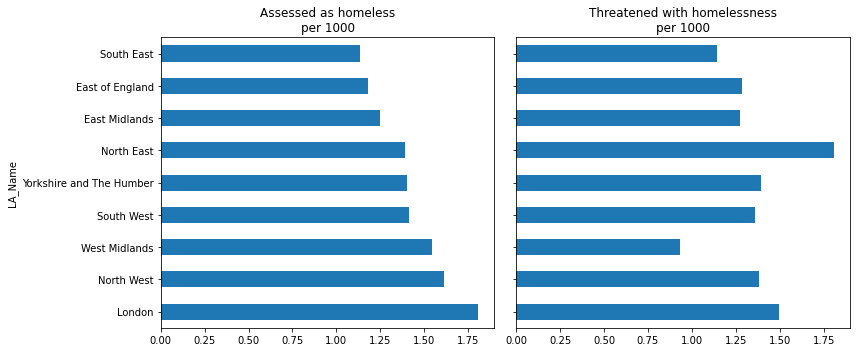

In [12]:
#REGIONAL
fig,axes = plt.subplots(ncols=2, figsize=(12,5),sharey=True)
ax=axes[0]
regions.set_index('LA_Name')['Households assessed as homelessper (000s)'].sort_values().iloc[::-1].plot(
    kind='barh',ax=ax)
ax.set_title('Assessed as homeless\nper 1000')

ax=axes[1]
regions.set_index('LA_Name').sort_values('Households assessed as homelessper (000s)')[
    'Households assessed as threatened with homelessnessper (000s)'].iloc[::-1].plot(
    kind='barh',ax=ax)
ax.set_title('Threatened with homelessness\nper 1000')


fig.tight_layout()
fig.show()

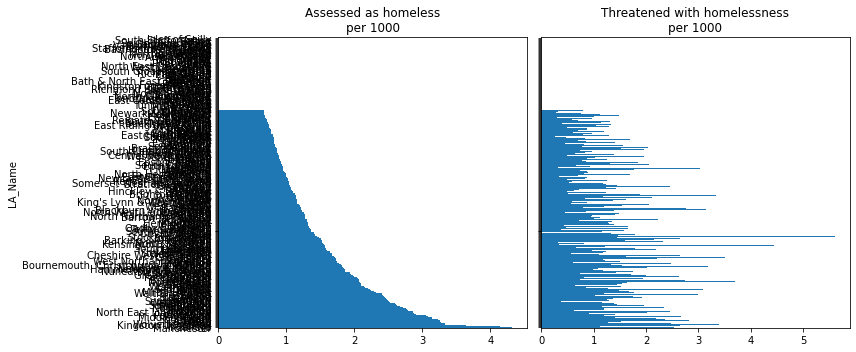

In [13]:
#WORST HIT LOCAL AUTHORITIES
fig,axes = plt.subplots(ncols=2, figsize=(12,5),sharey=True)

d = authorities.set_index('LA_Name').sort_values('Households assessed as homelessper (000s)').iloc[::-1,-5:].dropna().copy()

ax=axes[0]
d['Households assessed as homelessper (000s)'].plot(kind='barh',ax=ax)
# authorities.set_index('LA_Name')['Households assessed as homelessper (000s)'].sort_values().iloc[::-1].plot(
#     kind='barh',ax=ax)
ax.set_title('Assessed as homeless\nper 1000')

ax=axes[1]
d['Households assessed as threatened with homelessnessper (000s)'].plot(kind='barh',ax=ax)
# authorities.set_index('LA_Name').sort_values('Households assessed as homelessper (000s)')[
#     'Households assessed as threatened with homelessnessper (000s)'].iloc[::-1].plot(
#     kind='barh',ax=ax)
ax.set_title('Threatened with homelessness\nper 1000')


fig.tight_layout()
fig.show()

MOST HOMELESS

In [14]:
d['Households assessed as homelessper (000s)'].sort_values().iloc[::-1].head(10)

LA_Name
Manchester            4.319605
Salford               4.138356
Hastings              3.644920
Kingston upon Hull    3.328109
Wolverhampton         3.325160
Lincoln               3.277424
Torbay                3.263263
Lambeth               3.252115
Luton                 3.222467
Southwark             3.140408
Name: Households assessed as homelessper (000s), dtype: float64

MOST AT RISK

In [15]:
d['Households assessed as threatened with homelessnessper (000s)'].sort_values().iloc[::-1].head(10)

LA_Name
Stockton-on-Tees         5.605233
Ipswich                  4.442937
North Devon              3.704739
Derby                    3.505363
Kingston upon Hull       3.389741
Haringey                 3.327741
Welwyn Hatfield          3.190548
Blackburn with Darwen    3.152596
Enfield                  3.081179
Gateshead                3.036828
Name: Households assessed as threatened with homelessnessper (000s), dtype: float64

Cross reference with other regional data - eg hh income edu, health risks etc etc?